# Used Car price Prediction

**Goal: To build, train, test and deploy a machine learning regression model to predict used car prices using the features.**

**We use an XGBoost algorithm to predict the used car prices using the used_car_prices dataset.**

**Data:**

*Dataset: used_car_prices.csv*

*Features: Make, Model, Type, Origin, Drivetrain, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase, Length*

*Target class: MSRP(price)*

### Necessary imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

### Reading the used_car_price dataset using pandas dataframe

In [ ]:
# Importing the csv files using pandas
car_df=pd.read_csv('used_car_price.csv')

#### Checking the head of the dataset

In [ ]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


## Checking for null values

In [ ]:
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

There are no null values in the dataset.

#### Checking the info of the dataset

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


## Data Visualization

#### Different types of cars and correspondingly their prices

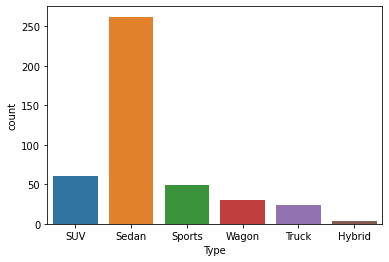

In [ ]:
sns.countplot(x='Type',data=car_df)

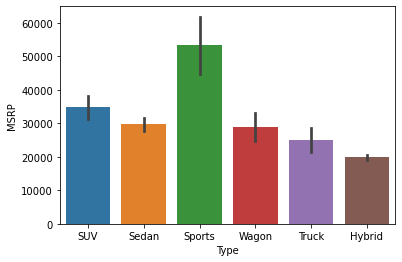

In [ ]:
sns.barplot(x='Type',y='MSRP',data=car_df)

Most used cars are Sedan while the highest price for used cars are for Sports cars. Type is an important feature for car price and hence we would need to do a one-hot encoding for this column.

#### Different origins of cars and their respective prices

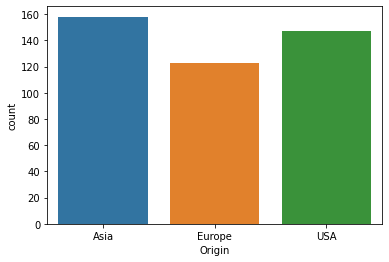

In [ ]:
sns.countplot(x='Origin',data=car_df)

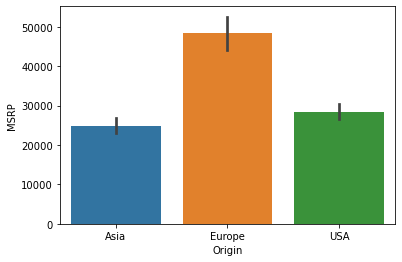

In [ ]:
sns.barplot(x='Origin',y='MSRP',data=car_df)

Most used cars are from Asian origin, and least are European origin; while the highest price for used cars are cars from European origin.Thus, Origin is an important feature for car price and hence we would need to do a one-hot encoding for this column as well.

#### Different Drivetrain of cars and their respective prices

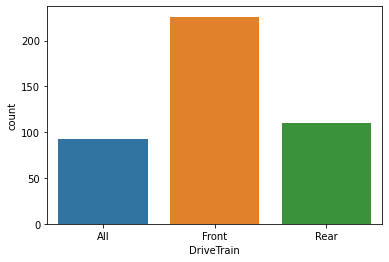

In [ ]:
sns.countplot(x='DriveTrain',data=car_df)

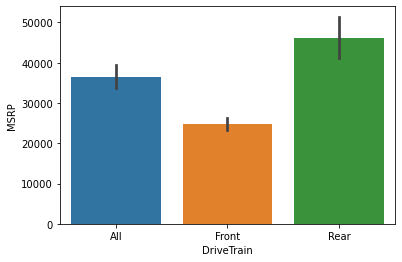

In [ ]:
sns.barplot(x='DriveTrain',y='MSRP',data=car_df)

Most of the cars in the dataset have Front drive train, while price is least for the same category. We also one-hot encode DriveTrain. 

## Data Preparation

Breaking the entire dataset into smaller dataframes which can easily be processed. The 'todummy_df' will be used for one-hot encoding, 'cat_df' will be used for dealing with integer encoding and 'remaining_df' will remain the same since it is integer type.

In [ ]:
todummy_df = car_df[['Type','Origin','DriveTrain']]

In [ ]:
cat_df = car_df[['Make','Model']]
cat_df.head()

,Make,Model
0,Acura,MDX
1,Acura,RSX Type S 2dr
2,Acura,TSX 4dr
3,Acura,TL 4dr
4,Acura,3.5 RL 4dr


In [ ]:
remaining_df = car_df[['EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway','Weight','Wheelbase','Length','MSRP']]

In [ ]:
remaining_df

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,3.5,6,265,17,23,4451,106,189,36945
1,2.0,4,200,24,31,2778,101,172,23820
2,2.4,4,200,22,29,3230,105,183,26990
3,3.2,6,270,20,28,3575,108,186,33195
4,3.5,6,225,18,24,3880,115,197,43755
...,...,...,...,...,...,...,...,...,...
423,2.4,5,197,21,28,3450,105,186,40565
424,2.3,5,242,20,26,3450,105,186,42565
425,2.9,6,268,19,26,3653,110,190,45210
426,1.9,4,170,22,29,2822,101,180,26135


### One-hot encoding Type, Origin and DriveTrain columns

In [ ]:
dummy_df = pd.get_dummies(todummy_df, drop_first=True)

In [ ]:
dummy_df.head()

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0


### Label encoding Make and Model column

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
cat_df['Make'] = label_encoder.fit_transform(cat_df['Make'])

<ipython-input-92-29c7a01a0afc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Make'] = label_encoder.fit_transform(cat_df['Make'])


In [ ]:
cat_df['Model'] = label_encoder.fit_transform(cat_df['Model'])

<ipython-input-93-7d53c32b51e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Model'] = label_encoder.fit_transform(cat_df['Model'])


In [ ]:
cat_df.head()

,Make,Model
0,0,229
1,0,293
2,0,366
3,0,365
4,0,0


#### Final prepared dataset

In [ ]:
df = pd.concat([cat_df,dummy_df,remaining_df],axis=1)

In [ ]:
df.head()

,Make,Model,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,0,229,1,0,0,0,0,0,0,0,0,3.5,6,265,17,23,4451,106,189,36945
1,0,293,0,1,0,0,0,0,0,1,0,2.0,4,200,24,31,2778,101,172,23820
2,0,366,0,1,0,0,0,0,0,1,0,2.4,4,200,22,29,3230,105,183,26990
3,0,365,0,1,0,0,0,0,0,1,0,3.2,6,270,20,28,3575,108,186,33195
4,0,0,0,1,0,0,0,0,0,1,0,3.5,6,225,18,24,3880,115,197,43755


Now, all the columns are numeric and hence can be used for the ML algorithm.

# XGBoost Model

### Preparing the data for XGBoost model

Splitting the feature and target data in the dataset.

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [ ]:
X.shape

(428, 19)

In [ ]:
y.shape

(428, 1)

Splitting the data into training, validation and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [ ]:
X_train.shape

(342, 19)

In [ ]:
y_train.shape

(342, 1)

Here we convert the array into a dataframe in a way such that the target variable is set as the first column and followed by feature columns.
This is becuase sagemaker built-in algorithm expects the data in this format.

In [ ]:
train_data=pd.DataFrame({'Target':y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i]=X_train[:,i]


In [ ]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,33360,30.0,21.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,210.0,20.0,28.0,3175.0,105.0,183.0
1,26930,8.0,167.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.9,6.0,193.0,17.0,23.0,4275.0,121.0,201.0
2,30860,30.0,23.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,210.0,20.0,28.0,3175.0,105.0,183.0
3,22388,22.0,234.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,4.0,142.0,23.0,28.0,2387.0,89.0,156.0
4,27995,5.0,196.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.8,6.0,240.0,18.0,28.0,3606.0,111.0,200.0


Doing the same with the validation data.

In [ ]:
val_data=pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i]=X_val[:,i]

In [ ]:
val_data.shape

(43, 20)

Saving the training data and validation data as csv files

In [ ]:
train_data.to_csv('train.csv',header=False,index=False)
val_data.to_csv('validation.csv',header=False,index=False)

Necessary imports for AWS Sagemaker

In [ ]:
#import sagemaker
#import boto3
#from sagemaker import Session

Creating a sagemaker session

In [ ]:
#sagemaker_session=sagemaker.Session()
#bucket=Session().default_bucket()
#prefix='XGBoost-Regressor'
#key='XGBoost-Regressor'

Roles give learning and hosting access to the data
This is specified while opening the sagemaker instance in "Create an IAM role"


In [ ]:
#role=sagemaker.get_execution_role()

In [ ]:
#print(role)

Here, we read the data from the csv file and then upload the data to the s3 bucket. We first upload the data into s3 bucket to be accesed later for training. Then we print the training data location.

In [ ]:
#import os
#with open('train.csv','rb') as f:
#    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).uploadfileobj(f)
    

#s3_train_data='s3://{}/{}/train/{}'.format(bucket,prefix,key)
#print('uploaded training data location:{}'.format(s3_train_data))

Doing the same with the validation data.

In [ ]:
#with open('validation.csv','rb') as f:
#    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix,'validation',key)).uploadfileobj(f)
    

#s3_train_data='s3://{}/{}/train/{}'.format(bucket,prefix,key)
#print('uploaded training data location:{}'.format(s3_train_data))

Setting and printing the Output location

In [ ]:
#output_location="s3://{}/{}/output".format(bucket,prefix)
#print('training artifacts will be uploaded to: {}'.format(output_location))

This code is used to get the training container of sagemaker built-in algorithms.

Note that all regression models are named estimators

In [ ]:
# container=sagemaker.image_uris.retrieve("xgboost",boto3.Session().region_name,version='1.0-1')

We Specify the type of instance that we would like to use for training, output path and sagemaker session into the estimator.
We can also specify how many instances we would like to use for training.

Recall that XGboost works by combining an ensemble of weak models to generate accurate/robust results.The weak models are randomized to avid overfitting.

num_round: the number of rounds to run the training
eta: step size shrinkage used in updates to prevent overfitting.
After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.

In [ ]:
use_spot_instances=True
max_run=3600
max_wait=7200 if use_spot_instances else None



#car_Xgboost_regressor=sagemaker.estimator.Estimator(container,role,
#                                                    instance_count=1,
#                                                    instance_type='ml.m5.xlarge',
#                                                    output_path=output_location,
#                                                    sagemaker_session=sagemaker_session,
#                                                    use_spot_instances=use-spot_instances,
#                                                    max_run=max_run,
#                                                    max_wait=max_wait)


Now we tune the hyperparameters to improve the performance of the model.

In [ ]:
#car_Xgboost_regressor.set_hyperparameters(max_depth=3,
#                                          obkjective='reg:squarederror',
#                                          colsample_bytree=0.3,
#                                           alpha=0.1,
#                                           eta=0.4,
#                                           num_round=100)

Reading the training and validation input and creating a data channel to fit the model.

In [ ]:
#train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'csv',s3_data_type = 'S3Prefix')
#valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type = 'csv',s3_data_type = 'S3Prefix')

#data_channels = {'train': train_input,'validation': valid_input}

Fitting the model on the training data.

In [ ]:
#car_Xgboost_regressor.fit(data_channels)

### Deploying the model to make predictions

In [ ]:
#predictor=car_Xgboost_regressor.deploy(initial_instance_count=1,instance_type='ml.m5.xlarge')

Creating an endpoint to do predictions and model evaluation.

In [ ]:
#predictor.endpoint_name

Serializing:

In [ ]:
#from sagemaker.predictor import csv_serializer,json_deserializer
#predictor.serializer=csv.serializer

Make the predictions.

In [ ]:
#predictions=predictor.predict(X_test)
#predictions

In [ ]:
#custom code to convert the values in bytes

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l=str(x).split(',')
    
    #since the first element contains unwanted characters like(b,',') we remove them
    
    l[0]=l[0][2:]
    for i in range(len(l)):
        l[i]=float(l[i])
        
    #converting the list into array
    l=np.array(l).astype('float32')
    
    #reshape one-dimensional array to two dimensional array
    return l.reshape(-1,1)

Predicted values.

In [ ]:
# predicted_values=bytes_2_array(predictions)

Model evaluation:

Here we find the metrics root mean squared error, mean absolute error, mean squared error, R-squared score and adjusted R-squared score.

In [ ]:
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from math import sqrt
#k = X_test.shape[1]
#n = len(X_test)
#RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
#MSE = mean_squared_error(y_test, predicted_values)
#MAE = mean_absolute_error(y_test, predicted_values)
#r2 = r2_score(y_test, predicted_values)
#adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)



#print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

Plotting the model predictions with respect to the true values of y.

In [ ]:
#plt.plot(y_test,predicted_values,'^',color='r')
#plt.xlabel('Model Predictions')
#plt.ylabel('True values')
#plt.show()

Deleting the endpoint

In [ ]:
# predictor.delete_endpoint()

## Hyperparameter Tuning

Creating a container.

In [ ]:
# container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

max_run: Timeout in seconds for training (default: 24 * 60 * 60). After this amount of time Amazon SageMaker terminates the job regardless of its current status.
max_wait: Timeout in seconds waiting for spot training job (default: None). After this amount of time Amazon SageMaker will stop waiting for managed spot training job to complete (default: None).

In [ ]:
#Xgboost_regressor = sagemaker.estimator.Estimator(container,
#                                       role, 
#                                       instance_count = 1, 
#                                       instance_type = 'ml.m4.xlarge',
#                                       input_mode = 'File',
#                                       use_spot_instances = True, 
#                                       max_run = 300, 
#                                       max_wait = 600, 
#                                       output_path = output_location,
#                                       sagemaker_session = sagemaker_session)

Hyperparameter setting

In [ ]:
#Xgboost_regressor.set_hyperparameters(objective = 'reg:squarederror',
#                                      early_stopping_rounds = 10,
#                                      num_round = 150)

Creating hyperparameter ranges within which model can be tuned

In [ ]:
#from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner 
#hyperparameter_ranges = {'eta': ContinuousParameter(0.1, 0.9), 
#                        'min_child_weight': ContinuousParameter(5, 10),
#                        'alpha': ContinuousParameter(0.1, 0.4),
#                        'max_depth': IntegerParameter(8, 15)}

Creating a hyperparameter tuning job

In [ ]:
#tuner=HyperparameterTuner(Xgboost_regressor,
#                         objective_metric_name='validation:rmse',
#                         hyperparametr_ranges=hyperparameter_ranges,
#                         objective_type='Minimize',
#                         max_jobs=5,
#                         max_parallel_jobs=1)

This process will take some time to naviagte to Hyperparameters tuning jobs in the AWS Sagemaker.

In [ ]:
# tuner.fit(data_channels)

Once the tuning job is complete, we can now view the analytics on the tuning job.

In [ ]:
#from sagemaker.analytics import HyperparameterTuningJobAnalytics
#summary = HyperparameterTuningJobAnalytics(sagemaker_session = sagemaker_session,
#                                       hyperparameter_tuning_job_name = tuner.latest_tuning_job.name).dataframe()

## Deploying the Tuned Model

In [ ]:
#xgb_endpoint=tuner.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')

In [ ]:
#from sagemaker.predictor import csv_serializer,json_deserializer
#xgb_endpoint.serializer=csv_serializer

In [ ]:
#predictions=xgb_endpoint.predict(X_test)
#predictions

In [ ]:
#predicted_values=bytes_2_array(predict)

Model evaluation

In [ ]:
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from math import sqrt
#k = X_test.shape[1]
#n = len(X_test)
#RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
#MSE = mean_squared_error(y_test, predicted_values)
#MAE = mean_absolute_error(y_test, predicted_values)
#r2 = r2_score(y_test, predicted_values)
#adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)



#print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

In [ ]:
#plt.plot(y_test,predicted_values,'^',color='r')
#plt.xlabel('Model Predictions')
#plt.ylabel('True values')
#plt.show()

Deleting the endpoint

In [ ]:
#predictor.delete_endpoint()